## Introduction

This data analysis is the work of Zuber, a ride-sharing company that is launching in Chicago. The task is to find patterns in the available data.

## Objective

Understand passenger preferences and the impact of external factors on trips by working with available databases.

Competitor data should be analyzed, and hypotheses about the impact of weather on trip frequency should be tested.

## Database Description

The data is available in a Database Management System (DBMS) with Structured Query Language - SQL (Structured Query Language) in the following spreadsheets:

**neighborhoods** table with data about the city's neighborhoods
- `name`: neighborhood name
- `neighborhoods_id`: neighborhood code

**cabs** table with data about taxis
- `cab_id`: vehicle code
- `vehicle_id`: vehicle's technical identification
- `company_name`: the company that owns the vehicle

**trips** table with data about trips
- `trip_id`: trip code
- `cab_id`: code of the vehicle that operates the trip
- `start_ts`: date and time of the start of the trip (time rounded to the nearest hour)
- `end_ts`: date and time of the end of the trip (time rounded to the nearest hour)
- `duration_seconds`: duration of the trip in seconds
- `distance_miles`: distance of the route in miles
- `pickup_location_id`: code of the neighborhood where the ride started
- `dropoff_location_id`: code of the neighborhood where the ride ended

**weather_records** table with weather data
- `record_id`: weather record code
- `ts`: date and time of the record (time rounded to the nearest hour)
- `temperature`: temperature when the record was made
- `description`: brief description of the weather conditions, e.g. "light rain" or "scattered clouds"

### ER diagram of tables

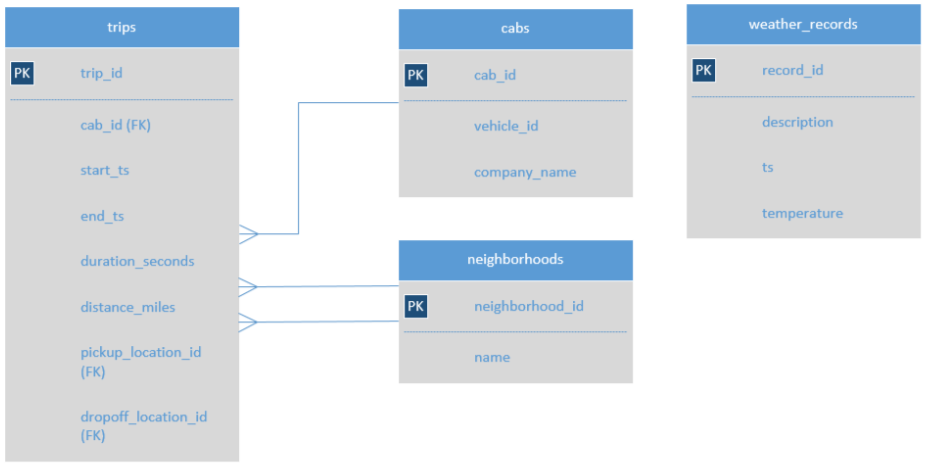

There is no direct connection between the **trips** and **weather_records** tables in the database. However, it is possible to use the "JOIN" method and join them using the time the trip started (`trips.start_ts`) and the time the weather record was made (`weather_records.ts`) if necessary for data analysis.

## Exploratory Data Analysis - SQL

### Taxi Ride Analysis

Data will be analyzed to find the number of taxi rides for each taxi company from November 15 to 16, 2017.

The data will be available in the following spreadsheet: `project_sql_result_01.csv`
- `company_name`: name of the taxi company
- `trips_amount`: the number of rides for each taxi company from November 15 to 16, 2017.

### Analysis of Trips for Neighborhoods and Average Number

Data from the tables was analyzed and data was found on the neighborhoods where trips ended in the city of Chicago and the average number of trip endings per neighborhood.

The data was made available in the following spreadsheet: `project_sql_result_04.csv`
- `dropoff_location_name`: Chicago neighborhoods where trips ended
- `average_trips`: the average number of trips that ended in each neighborhood in November 2017.

**NOTE**: This report does not include SQL data analysis and processing.

## Exploratory Data Analysis - Python

For the data contained in the files `project_sql_result_01.csv` and `project_sql_result_04.csv` will be analyzed to identify the main neighborhoods in terms of destinations, obtaining relevant conclusions for the company.

### Data Initialization

In [1]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math as mt
from scipy import stats as st


### Loading Data
Loading data from files.

In [2]:
# Loading taxi ride data file
df_cabs = pd.read_csv('project_sql_result_01.csv')

# Loading taxi ride neighborhood data file
df_neighb = pd.read_csv('project_sql_result_04.csv')

# Loading Loop Airport ride data file
df_loop = pd.read_csv('project_sql_result_07.csv')

### Preparing Data for Analysis

#### Taxi Ride Data
Below we have a description of the taxi ride data by company on November 15 and 16, 2017.
- `company_name`: name of the taxi company
- `trips_amount`: the number of rides for each taxi company from November 15 to 16, 2017.

In [3]:
# Printing general/summary information
df_cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Printing a sample of data
display(df_cabs.head(50))

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [5]:
# Quick statistical analysis
print(df_cabs.describe())

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


The taxi ride data file contains 64 lines with 2 columns. There is no inconsistency in the classification regarding data types and there are no missing values.

However, there are company names that have 'numbers' in their description, which could make it difficult to understand and analyze the data. However, since only the 10 companies with the highest number of rides will be analyzed, this inconsistency will not be addressed.

On average, there are 2,145.48 rides per company, with a high standard deviation of 3,812.31 and a lower median of 178.50. This shows that there is a large fluctuation in the number of rides performed by the companies.

In [6]:
# Selecting the 10 companies with the most trips
df_cabs_10 = df_cabs.head(10)

# Checking
display(df_cabs_10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [7]:
# Quick statistical analysis of only the 10 companies with the highest number of trips
print(df_cabs_10.describe())

       trips_amount
count     10.000000
mean    9927.200000
std     3729.509703
min     5953.000000
25%     7887.750000
50%     9240.000000
75%    10247.250000
max    19558.000000


Performing this analysis with only the 10 companies with the most trips, we notice that we have different results.
There is a higher average of 9927.20 trips, which was to be expected since it only deals with companies with the highest volumes. We have a similar standard deviation of 3729.50, but a median of 9240.00, which is completely different when considering all companies and is similar to the average.

Graphs will be created to analyze the 10 companies with the highest number of races.

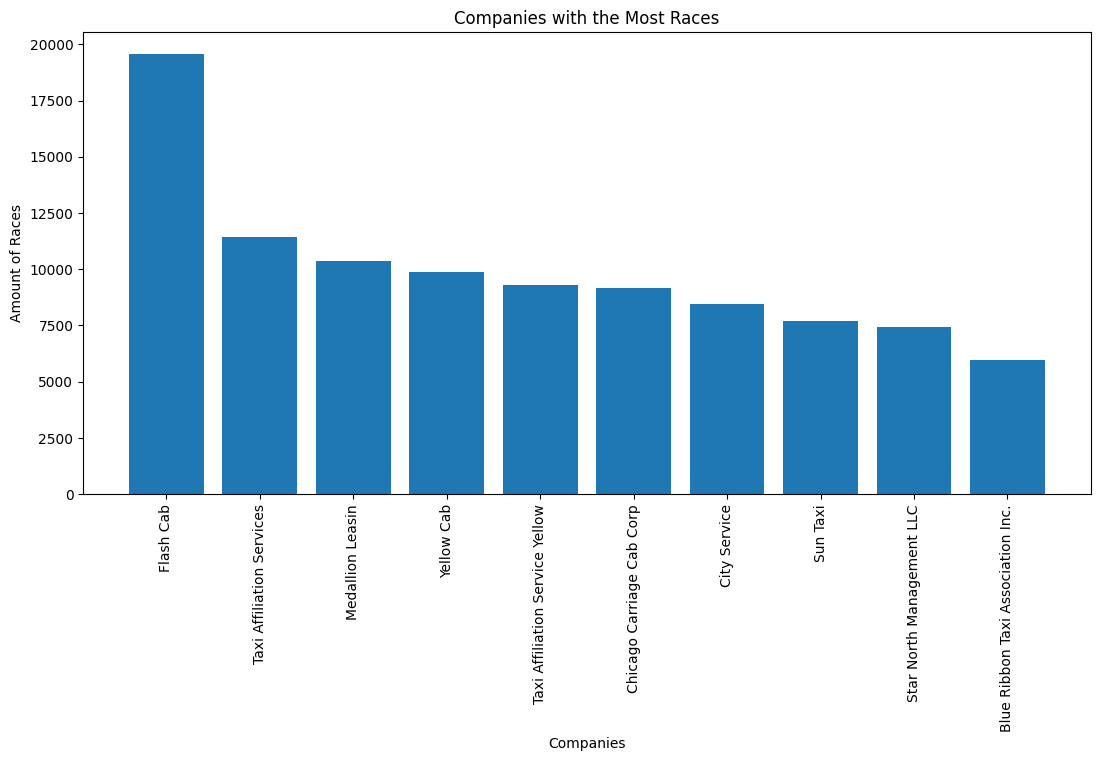

In [8]:
# Building bar chart
# Defining axis data
x=df_cabs_10['company_name']
y=df_cabs_10['trips_amount']

# Plotting Bar Graph
plt.figure(figsize=(13,6))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.title('Companies with the Most Races')
plt.ylabel('Amount of Races')
plt.xlabel('Companies')
plt.show()

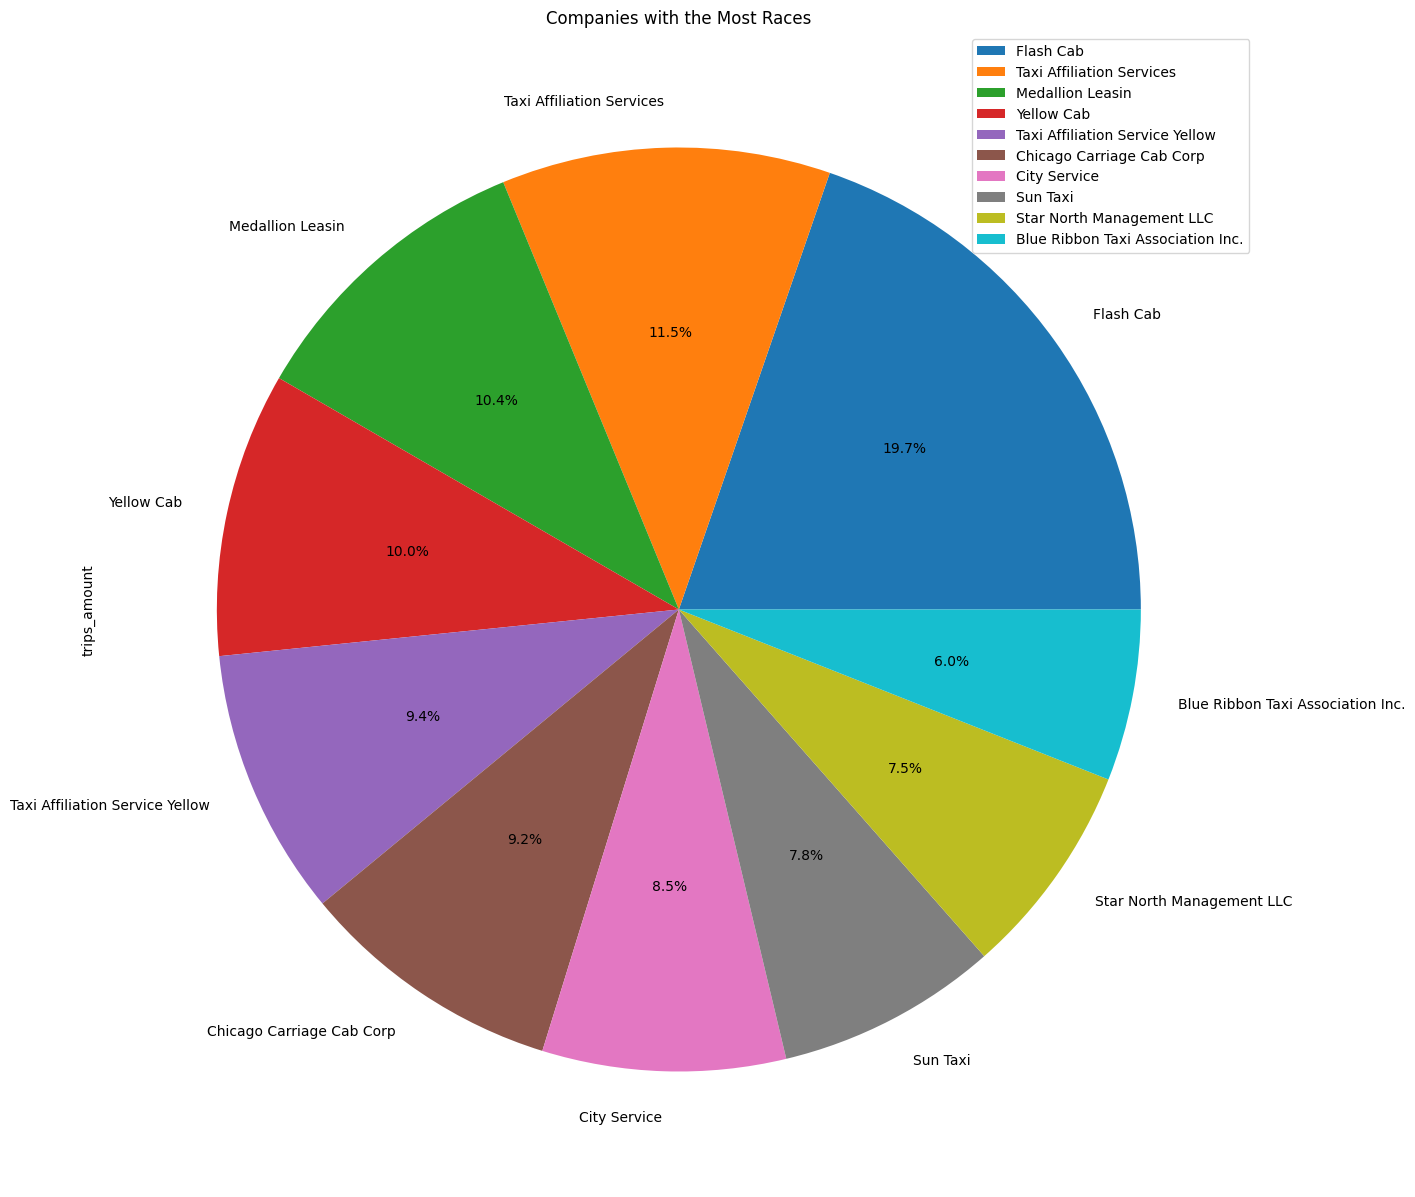

In [9]:
# Building a pie chart
# Plotting Bar Graph
df_cabs_10.plot(y='trips_amount', labels=df_cabs_10['company_name'], kind='pie', figsize=(15,15), autopct='%1.1f%%')
plt.title('Companies with the Most Races')
plt.show()

The companies **Flash Cab, Taxi Affiliation Services, Medallion Leasing** and **Yellow Cab** are responsible for **51.6%** of the total trips among these 10 with the highest volumes. The first, alone, is responsible for **19.7%** of the total of these trips.

#### Data on Neighborhoods where the rides ended
Below is a description of the data on Neighborhoods as destinations for the requested rides.
- `dropoff_location_name`: Chicago neighborhoods where the rides ended
- `average_trips`: the average number of trips that ended in each neighborhood in November 2017.

In [10]:
# Printing general/summary information
df_neighb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [11]:
# Imprimindo uma amostra de dados
display(df_neighb.head(60))

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [12]:
# Quick statistical analysis
print(df_neighb.describe())

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


The data file on the destination neighborhoods of taxi rides contains 94 rows with 2 columns. There is no inconsistency in the classification regarding the types of data and there are no missing values.

The average (of the average number of rides) is 599.95 rides for each neighborhood with a high standard deviation of 1714.59 and a very different median of only 52.01. This shows that there is a large fluctuation in the average number of rides between the destination neighborhoods of the companies.

Graphs will be created for analysis as a reference for the 10 neighborhoods with the most records as travel destinations.

In [13]:
# Selecting the 10 neighborhoods with the most races as destinations
df_neighb_10 = df_neighb.head(10)

# Checking
display(df_neighb_10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [14]:
# Análise estatística rápida somente dos 10 bairros com maiores volumes de destinos das corridas
print(df_neighb_10.describe())

       average_trips
count      10.000000
mean     4324.986667
std      3530.183508
min      1259.766667
25%      1649.633333
50%      2483.933333
75%      6289.416667
max     10727.466667


As expected, the average (of the race averages) is 4324.98, which is much higher when analyzing the total volume of races. The Standard Deviation (of the averages) 'jumped' to 3530.18, which is almost double when compared to the total analysis. The median (of the averages) is 2483.93, which is almost half the value of the average (of the race averages).

Graphs will be created to analyze only the 10 destination neighborhoods with the highest number of trips.

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667


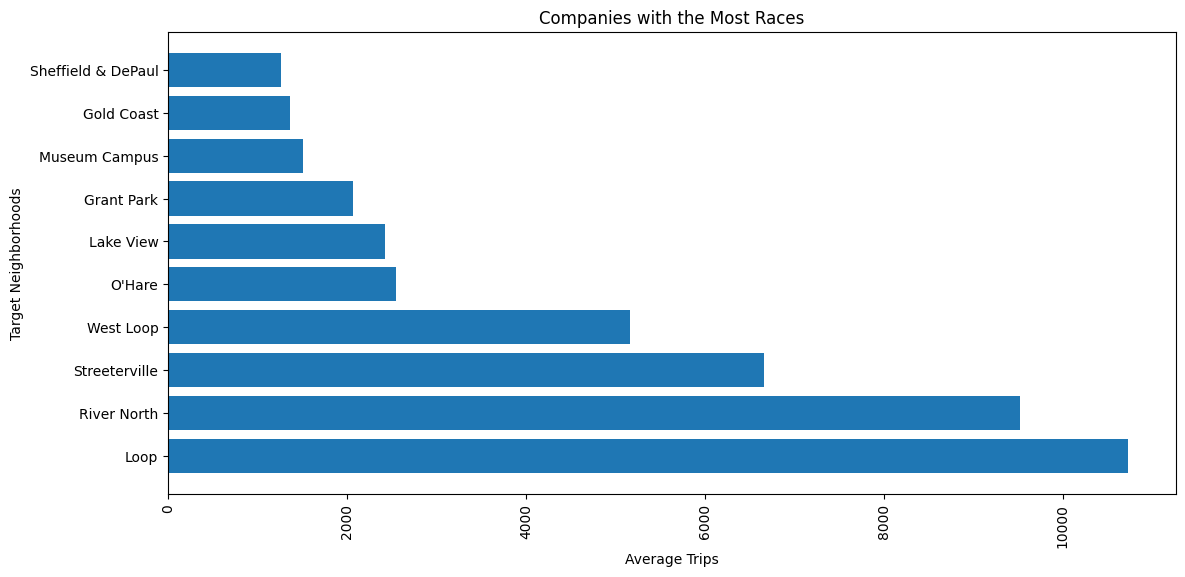

In [15]:
display(df_neighb_10.head(2))
# Building a bar chart
# Defining data axes
x=df_neighb_10['dropoff_location_name']
y=df_neighb_10['average_trips']

# Plotando Gráfico de barras
plt.figure(figsize=(13,6))
plt.barh(x, y)
plt.xticks(rotation=90)
plt.title('Companies with the Most Races')
plt.ylabel('Target Neighborhoods')
plt.xlabel('Average Trips')
plt.show()

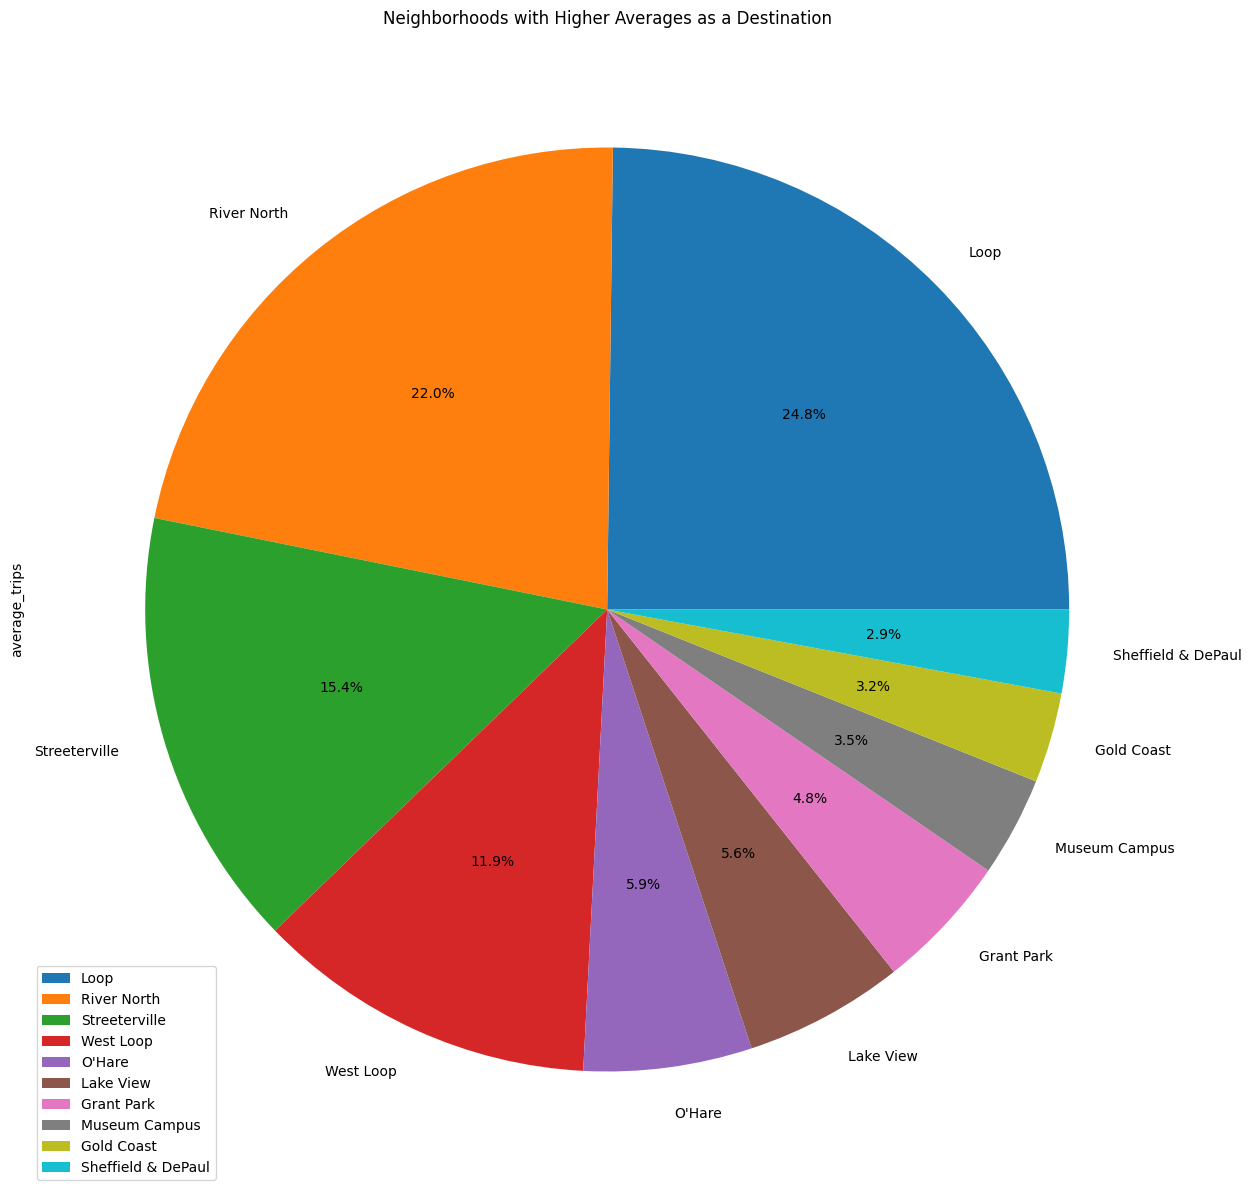

In [16]:
# Building a Pie Chart
# Plotting a Bar Chart
df_neighb_10.plot(y='average_trips', labels=df_neighb_10['dropoff_location_name'], kind='pie', figsize=(15,15), autopct='%1.1f%%')
plt.title('Neighborhoods with Higher Averages as a Destination')
plt.show()

The **Loop, River North** and **Streeterville** neighborhoods account for **62.2%** of the total ride destinations among these 10 with the highest volumes. The first one, alone, is responsible for **24.80%** of the total rides.

## Testando Hipótese

To conclude the studies, the following hypotheses will be tested:

- "The average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays."

The alternative and null hypotheses will be formulated based on what we want to verify. The null hypothesis will be that the averages are the same and the alternative hypothesis will be that they are different.

For the test, we will have a null and an alternative hypothesis and the critical level of significance will be 5%.

The level of significance is the limit that determines whether the result of the study will be considered statistically significant after the tests. Working with 5%, this indicates a 5% risk of concluding that there is a difference between the results of the study and the null hypothesis, when in fact there is no difference.

The `project_sql_result_07.csv` spreadsheet contains data about Loop trips to O'Hare International Airport as follows:
- `start_ts`: date and time the race began
- `weather_conditions`: weather conditions at the time the race began
- `duration_seconds`: duration of the race in seconds

The data in this spreadsheet will be analyzed and adjusted so that the hypothesis can be tested.

### Analyzing and adapting spreadsheet data

In [17]:
# Printing information
df_loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [18]:
# Printing a sample of the data
display(df_loop.head(10))

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


The data file for Loop taxi rides to O'Hare International Airport contains 1068 rows with 3 columns. There are inconsistencies in the classification regarding the data types of the `start_ts` and `duration_seconds` columns. There are no missing values ​​present.

In order to test the proposed hypothesis, the following actions will need to be performed:
- adapt the data types of the columns with inconsistencies
- create a column containing the days of the weeks of the rides
- create a pd.Series with the ride times when the weather was good and another with bad weather (rainy)

### Adapting and adjusting data

First, the inconsistent data types will be converted.
Those in the `start_ts` column from object to datetime and those in the `duration_seconds` column from float to integer.

In [19]:
# Converting the data type of the start_ts column
df_loop['start_ts'] = pd.to_datetime(df_loop['start_ts'], format='%Y-%m-%d %H:%M:%S')

# Converting the data type of the duration_seconds column
df_loop['duration_seconds'] = df_loop['duration_seconds'].astype(int)

# Checking
df_loop.info()
print()
display(df_loop.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB



,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


In [20]:
# Creating a column with the days of the week
df_loop['weekday'] = df_loop['start_ts'].dt.weekday

# Checking constant weekdays
print(df_loop['weekday'].unique())

# Checking table
display(df_loop)

[5]


,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410,5
1,2017-11-25 14:00:00,Good,1920,5
2,2017-11-25 12:00:00,Good,1543,5
3,2017-11-04 10:00:00,Good,2512,5
4,2017-11-11 07:00:00,Good,1440,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0,5
1064,2017-11-11 10:00:00,Good,1318,5
1065,2017-11-11 13:00:00,Good,2100,5
1066,2017-11-11 08:00:00,Good,1380,5


There are only Saturday races registered in the `df_loop` spreadsheet.
Now the pd.series will be created for the hypothesis test.

### Hypothesis between Saturday trips

Null Hypothesis (H<sub>0</sub>): The average trip length from the Loop to O'Hare International Airport does not change on rainy Saturdays.

Alternative Hypothesis (H<sub>1</sub>): The average trip length from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [21]:
# Creating a df with weather conditions and travel times
df_loop_timetrip = df_loop[['weather_conditions', 'duration_seconds']]

# Creating a pd.Series with only good weather (good)
df_loop_timetrip_good = df_loop_timetrip.loc[df_loop_timetrip['weather_conditions'] == 'Good']
df_loop_timetrip_good = df_loop_timetrip_good.drop('weather_conditions', axis=1)
df_loop_timetrip_good = df_loop_timetrip_good.reset_index(drop=True)
df_loop_timetrip_good.columns = ['weather_good_duration']

# Creating a pd.Series with only bad weather (bad/rainy)
df_loop_timetrip_bad = df_loop_timetrip.loc[df_loop_timetrip['weather_conditions'] == 'Bad']
df_loop_timetrip_bad = df_loop_timetrip_bad.drop('weather_conditions', axis=1)
df_loop_timetrip_bad = df_loop_timetrip_bad.reset_index(drop=True)
df_loop_timetrip_bad.columns = ['weather_bad_duration']

# Checking variances
print('Variance:', np.var(df_loop_timetrip_good))
print('Variance:', np.var(df_loop_timetrip_bad))
print()

# Testing hypotheses considering equal variances
alpha = 0.05

results = st.ttest_ind(df_loop_timetrip_good, df_loop_timetrip_bad)
print('p_value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis.')
else:
    print('Do not reject the null hypothesis.')

Variance: weather_good_duration    575732.93085
dtype: float64
Variance: weather_bad_duration    517403.563302
dtype: float64

p_value: [6.51797033e-12]
Reject the null hypothesis.


/Users/thiagodelreyramosdemelo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4316: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


The null hypothesis was rejected by the equality of means test. This means that the average trip length from the Loop to O'Hare International Airport changes on rainy Saturdays.

## General Conclusion

- The data file on taxi rides does not have any inconsistency in the classification regarding data types and there are no missing values. There are company names that have 'numbers' in their description, but this did not hinder the analyses.

- A large fluctuation was observed in the number of rides performed by the companies.

- Analysis of only the 10 companies with the most rides yields different results. There is a higher average number of rides, since it is only the companies with the highest volumes. We have a similar standard deviation, but a completely different median when considering all companies.

- Considering only the 10 companies with the most rides, Flash Cab, Taxi Affiliation Services, Medallion Leasing and Yellow Cab are responsible for 51.6% of the total. The first is responsible for 19.7% of the rides.

- The data file on the destination neighborhoods of taxi rides does not have any inconsistency in the classification regarding data types and there are also no missing values.

- There is a large variation in the average number of trips between the neighborhoods used by the companies.

- Considering only the 10 neighborhoods with the highest volumes as destinations, the average (of the average number of trips) is much higher when analyzing the total volume of trips. The Standard Deviation doubled when compared to the total analysis. The median (of the averages) is almost half the value of the average (of the average number of trips).

- The Loop, River North and Streeterville neighborhoods are responsible for 62.2% of the total trip destinations among these 10 with the highest volumes. The first neighborhood is responsible for 24.80% of the total number of trips.

- The null hypothesis was rejected by the test for equality of means. This means that the average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays.